# Import libraries
With your Visual Studio Code local environment set up, you can now import the libraries. They'll help us import and clean the weather data, and create and test the machine learning model.

Copy the following code into a cell and run it to import the libraries.

In [31]:
# Pandas library is used for handling tabular data
import pandas as pd
# NumPy is used for handling numerical series operations (addition, multiplication, and ...)
import numpy as np
# Sklearn library contains all the machine learning packages we need to digest and extract patterns from the data
from sklearn import linear_model, model_selection, metrics
from sklearn.model_selection import train_test_split

# Machine learning libraries used to build a decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Sklearn's preprocessing library is used for processing and cleaning the data 
from sklearn import preprocessing

# for visualizing the tree
import pydotplus
from IPython.display import Image

# Read data into a variable
Now that we have all of the libraries imported, we can use the pandas library to import our data. Use the command pd.read_excel to read the data and save it in a variable. Then, use the .head() function to print out the first five rows of the data. This will ensure that we have read everything correctly.

In [32]:
launch_data = pd.read_excel('RocketLaunchDataCompleted.xlsx')
launch_data.head()

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,...,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes
0,NaN,1958-12-04,NaN,Cape Canaveral,NaN,NaN,75.0,68.0,71.00,NaN,...,16.0,15.0,NaN,NaN,NaN,30.22,NaN,10:26:00,Cloudy,NaN
1,NaN,1958-12-05,NaN,Cape Canaveral,NaN,NaN,78.0,70.0,73.39,NaN,...,14.0,10.0,NaN,NaN,NaN,30.2,NaN,10:26:00,Cloudy,NaN
2,Pioneer 3,1958-12-06,01:45:00,Cape Canaveral,Uncrewed,Y,73.0,0.0,60.21,62.0,...,15.0,10.0,11.0,NaN,NaN,30.25,NaN,10:25:00,Cloudy,NaN
3,NaN,1958-12-07,NaN,Cape Canaveral,NaN,NaN,76.0,57.0,66.04,NaN,...,10.0,10.0,NaN,NaN,NaN,30.28,NaN,10:25:00,Partly Cloudy,NaN
4,NaN,1958-12-08,NaN,Cape Canaveral,NaN,NaN,79.0,60.0,70.52,NaN,...,12.0,10.0,NaN,NaN,NaN,30.23,NaN,12:24:00,Partly Cloudy,NaN


# Begin exploring data
Finally, we can use the .columns function call to view all of the columns in our data. This will show us the attributes that the data has. You'll see some common attributes like names of past rockets that were scheduled to launch, the dates they were scheduled, if they actually launched, and many more. Look at these columns and try to guess which ones will have the greatest impact on determining if a rocket will launch.

In [33]:
launch_data.columns

Index(['Name', 'Date', 'Time (East Coast)', 'Location', 'Crewed or Uncrewed',
       'Launched?', 'High Temp', 'Low Temp', 'Ave Temp', 'Temp at Launch Time',
       'Hist High Temp', 'Hist Low Temp', 'Hist Ave Temp',
       'Percipitation at Launch Time', 'Hist Ave Percipitation',
       'Wind Direction', 'Max Wind Speed', 'Visibility',
       'Wind Speed at Launch Time', 'Hist Ave Max Wind Speed',
       'Hist Ave Visibility', 'Sea Level Pressure',
       'Hist Ave Sea Level Pressure', 'Day Length', 'Condition', 'Notes'],
      dtype='object')

# Exercise - Clean weather data to analyze rocket launch criteria

Now that we have the data imported, we need to apply a machine learning practice known as "cleaning the data." This means taking data that looks incorrect or messy and cleaning it up by changing the value or deleting it altogether. Common examples of cleaning data are ensuring that there are no null values and making every value in a column look the same.

We do this because computers will get confused if they look at inconsistent data or if lots of values in the data are null.

# Data cleaning

The first step that you'll take to clean your data is to replace all the missing values with something. Replacing these values usually requires subject matter expertise, but in this case you'll use your best judgment. Some rows (remember, rows represent days) are missing weather or launch data.

To get started, first get an overview of the launch data by entering this command into a cell:

In [34]:
launch_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Name                          60 non-null     object        
 1   Date                          300 non-null    datetime64[ns]
 2   Time (East Coast)             59 non-null     object        
 3   Location                      300 non-null    object        
 4   Crewed or Uncrewed            60 non-null     object        
 5   Launched?                     60 non-null     object        
 6   High Temp                     299 non-null    float64       
 7   Low Temp                      299 non-null    float64       
 8   Ave Temp                      299 non-null    float64       
 9   Temp at Launch Time           59 non-null     float64       
 10  Hist High Temp                299 non-null    float64       
 11  Hist Low Temp                 29

You can see that Hist Ave Max Wind Speed, Hist Ave Visibility, and Hist Ave Sea Level Pressure have no data.

It makes sense that Wind Speed at Launch Time, Temp at Launch Time, Launched, Crewed or Uncrewed, Time, and Name have only 60 values, because the data includes only 60 launches. The rest are the days before and after the launch.

Here are a few ways to clean the data:

- The rows that don't have Y in the Launched column did not have a rocket launch, so make those missing values N.
- For rows missing information on whether the rocket was crewed or uncrewed, assume uncrewed. Uncrewed is more likely because there were fewer - crewed missions.
- For missing wind direction, mark it as unknown.
- For missing condition data, assume it was a typical day and use fair.
- For any other data, use a value of 0.

In [35]:
## To handle missing values, we will fill the missing values with appropriate values 
launch_data['Launched?'].fillna('N',inplace=True)
launch_data['Crewed or Uncrewed'].fillna('Uncrewed',inplace=True)
launch_data['Wind Direction'].fillna('unknown',inplace=True)
launch_data['Condition'].fillna('Fair',inplace=True)
launch_data.fillna(0,inplace=True)
launch_data.head()

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,...,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes
0,0,1958-12-04,0,Cape Canaveral,Uncrewed,N,75.0,68.0,71.00,0.0,...,16.0,15.0,0.0,0.0,0.0,30.22,0.0,10:26:00,Cloudy,0
1,0,1958-12-05,0,Cape Canaveral,Uncrewed,N,78.0,70.0,73.39,0.0,...,14.0,10.0,0.0,0.0,0.0,30.2,0.0,10:26:00,Cloudy,0
2,Pioneer 3,1958-12-06,01:45:00,Cape Canaveral,Uncrewed,Y,73.0,0.0,60.21,62.0,...,15.0,10.0,11.0,0.0,0.0,30.25,0.0,10:25:00,Cloudy,0
3,0,1958-12-07,0,Cape Canaveral,Uncrewed,N,76.0,57.0,66.04,0.0,...,10.0,10.0,0.0,0.0,0.0,30.28,0.0,10:25:00,Partly Cloudy,0
4,0,1958-12-08,0,Cape Canaveral,Uncrewed,N,79.0,60.0,70.52,0.0,...,12.0,10.0,0.0,0.0,0.0,30.23,0.0,12:24:00,Partly Cloudy,0


In [36]:
launch_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Name                          300 non-null    object        
 1   Date                          300 non-null    datetime64[ns]
 2   Time (East Coast)             300 non-null    object        
 3   Location                      300 non-null    object        
 4   Crewed or Uncrewed            300 non-null    object        
 5   Launched?                     300 non-null    object        
 6   High Temp                     300 non-null    float64       
 7   Low Temp                      300 non-null    float64       
 8   Ave Temp                      300 non-null    float64       
 9   Temp at Launch Time           300 non-null    float64       
 10  Hist High Temp                300 non-null    float64       
 11  Hist Low Temp                 30

# Data manipulation
Because computations are best suited for numerical inputs, convert all text into numbers. As an example, we'll use 1 if a rocket is crewed and 0 if a rocket is uncrewed.

In [37]:
## As part of the data cleaning process, we have to convert text data to numerical because computers understand only numbers
label_encoder = preprocessing.LabelEncoder()

# Three columns have categorical text info, and we convert them to numbers
launch_data['Crewed or Uncrewed'] = label_encoder.fit_transform(launch_data['Crewed or Uncrewed'])
launch_data['Wind Direction'] = label_encoder.fit_transform(launch_data['Wind Direction'])
launch_data['Condition'] = label_encoder.fit_transform(launch_data['Condition'])

In [38]:
launch_data.head()

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,...,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes
0,0,1958-12-04,0,Cape Canaveral,1,N,75.0,68.0,71.00,0.0,...,16.0,15.0,0.0,0.0,0.0,30.22,0.0,10:26:00,0,0
1,0,1958-12-05,0,Cape Canaveral,1,N,78.0,70.0,73.39,0.0,...,14.0,10.0,0.0,0.0,0.0,30.2,0.0,10:26:00,0,0
2,Pioneer 3,1958-12-06,01:45:00,Cape Canaveral,1,Y,73.0,0.0,60.21,62.0,...,15.0,10.0,11.0,0.0,0.0,30.25,0.0,10:25:00,0,0
3,0,1958-12-07,0,Cape Canaveral,1,N,76.0,57.0,66.04,0.0,...,10.0,10.0,0.0,0.0,0.0,30.28,0.0,10:25:00,6,0
4,0,1958-12-08,0,Cape Canaveral,1,N,79.0,60.0,70.52,0.0,...,12.0,10.0,0.0,0.0,0.0,30.23,0.0,12:24:00,6,0


# Determine columns to include in a machine learning model

To begin training our machine learning model, we'll start by teaching the computer what parts of the data to look at to make predictions. We know that the column we want the model to predict is the "Launched" column. We'll extract this column and store it in a variable as a list of Y and N.

# Further data cleansing

Next, we'll remove some of the columns that aren't needed for making this prediction. Columns like "Name" give us more context about the data. But the name of a launch isn't an indicator of whether weather will cause the launch to be postponed. In this module, we'll focus on the columns for wind speed, conditions, and precipitation.

In [39]:
# First, we save the output we are interested in. In this case, "launch" yes and no's go into the output variable.
y = launch_data['Launched?']

# Removing the columns we are not interested in
launch_data.drop(['Name','Date','Time (East Coast)','Location','Launched?','Hist Ave Sea Level Pressure','Sea Level Pressure','Day Length','Notes','Hist Ave Visibility', 'Hist Ave Max Wind Speed'],axis=1, inplace=True)

# Saving the rest of the data as input data
X = launch_data

In [40]:
# List of variables that our machine learning algorithm is going to look at:
X.columns

Index(['Crewed or Uncrewed', 'High Temp', 'Low Temp', 'Ave Temp',
       'Temp at Launch Time', 'Hist High Temp', 'Hist Low Temp',
       'Hist Ave Temp', 'Percipitation at Launch Time',
       'Hist Ave Percipitation', 'Wind Direction', 'Max Wind Speed',
       'Visibility', 'Wind Speed at Launch Time', 'Condition'],
      dtype='object')

# Choose the machine learning algorithm to predict rocket launch success

You've chosen which columns you want to use to predict whether a rocket would launch given certain weather conditions. Now, you'll need to choose which algorithm to use to make our model. Recall that you were introduced to the [Azure Machine Learning Algorithm Cheat Sheet](https://docs.microsoft.com/en-us/azure/machine-learning/algorithm-cheat-sheet)

Remember your question: Can you predict whether a launch is likely to be able to happen given specific weather conditions? This question has two choices. A rocket will launch, either yes or no. This question is considered a two-class classification problem.

Within this category of algorithm, there are many specific algorithms to choose from. In this case, you'll be exploring a two-class decision tree. Visualizing the results of a decision tree yields insights that will help you iterate on data collecting, cleansing, and manipulation in the future.

In [41]:
# Create decision tree classifier 
tree_model = DecisionTreeClassifier(random_state=0,max_depth=5)


Let's take a look at the [documentation for the decision tree classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decision%20tree%20classifier#sklearn.tree.DecisionTreeClassifier?azure-portal=true) and the importance of the parameters we specified here. The two parameters we specified are random_state and max_depth.

The random_state parameter will be used for most machine learning algorithms. It controls the randomness of the algorithm. When you use this estimator to split the data into data to train with and data to test with, the seed provided here dictates the randomness of that split. The next unit will provide more information on data splitting.

The max_depth parameter is a tree-specific parameter that allows you to scope the output of the model. In this case, it isn't likely to be informative to get every possible probability of a specific weather condition and its likely effect on the likelihood of a rocket launch. The depth will be capped at five to reduce the knowledge gained to what is most practically related to the outcome.

# Split data into training and testing datasets


The next step is to split your data into training data and testing data. Providing your machine learning classifier with all of your data will only make it effective at telling you what data you have. It won't yield accurate predictions.

Why should you split data?
One way to explain the importance of splitting data is to compare it to an exam you might take. Consider a formal class you might be taking. Throughout the class, you're shown example problems and told what the answers are. This scenario happens in lectures, homework, and on practice exams.

Imagine a class where your instructor gave you the exact exam and the exam key (answers) the day before the exam. Would you ace the test? Yes!

Would you know if you had learned the concepts? No. You're more likely to have learned the answers to the questions on the test and not the concepts the exam was trying to test.

If you want to actually learn, you should practice with problems for which you have the answers. When you feel confident about those problems, try problems for which you don't already know the answers. That's basically what the classifier is doing to "learn."

# Split data

You'll want to split your data into four new variables. You already have X and y that represent your input and your output. Now it's time to split them both into training and testing data.

By using scikit-learn and the classifier's splitting function, you can get a random sampling of X and y that match in order. If the data wasn't split randomly but instead the first 80% of the rows were taken for training data and the rest were left for testing, it would introduce problems.

For example, let's say the data is sorted in date order. If the first 240 rows were taken to train, then you would be training your model on data that predates 1999. This is an issue because the sensors might have changed over time. Only looking at older data might not be a good indicator for decisions that would be made with new technology.

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

# This code randomly separates the data into four groups: X_train, X_test, y_train, and y_test. With scikit-learn's train_test_split function, you specify four important parameters:

- Input data: X - All of the columns that we want to use to predict a launch.
- Output data: y - The outcome of each row (whether a rocket launched or not).
- Test size: 0.2 - Training your data on 80% and testing on 20% is a common split in data science.
- Random state: 99 - A random seed that will change the randomness of selecting the data.


# Train and test the machine learning model to predict rocket launch success

After the data is separated into the training and testing sections, we can train our machine learning model. One of the reasons Python is a popular language for data science and machine learning is because of all the libraries that exist to support the study of data. As we've seen, getting the machine learning model created and the data split was simple. Fitting and testing our model will also be simple.

# Fit the model
The next step in the data science lifecycle is to fit the model to the training data. The act of "fitting" is basically where the model is learning. This process was described with the berry example. The human was being "fitted" when they brought a berry and were told what kind it was. To fit the model, you call fit() on the machine learning classifier and pass in the X_train and y_train data.

Fitting the model is like doing a practice exam where you have access to the answers to ensure you understand the concepts.



In [43]:
# Fitting the model to the training data
tree_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

# Test the model
Testing your model is also made easy with the libraries we've imported. Testing the model is like taking the exam. You'll provide X_test (the 20% of the input data you reserved for testing) to the classifier's predict() function. This function returns a list of Y and N that represents what the model thinks would happen if a rocket launch was attempted given a particular set of weather conditions.

In [44]:
# Do prediction on test Data
y_pred = tree_model.predict(X_test)
print(y_pred)

['N' 'N' 'N' 'Y' 'N' 'N' 'N' 'N' 'Y' 'Y' 'N' 'Y' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'Y' 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'Y' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'Y' 'N' 'N' 'N' 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'Y']


# Score the machine learning model that predicts rocket launch success

Doing a simple comparison of percentage of data that resulted in a Y launch is useful for checking if the model is close to correct. But it's even more useful to actually score the model.

# Score the model
As with an exam, learning can be measured with a score. There's a one-line function you can call to see how accurate the model was at predicting whether a launch would happen.



In [45]:
# Calculate accuracy
tree_model.score(X_test,y_test)

0.9833333333333333

Using the score() function, you pass in the X_test input data and the y_test output data to "grade" the model. The higher the score, the more accurate our model is at predicting the outcome of a rocket launch based on weather data.

# Understand the score

The model in this example is 98.3% accurate, which is good. In fact, with the small amount of data cleansing and manipulation we did and with the known issues of the data, it seems a little too good.

Perhaps we have the best data and correctly trained our model to get so accurate. But maybe this accuracy rate means we're good at guessing this somewhat manufactured data, so this score wouldn't be reliable in the real world. For context, 70% accuracy with a decision tree classifier (when run the first time) is common.

How might you ensure that the score itself is an accurate representation of how accurate the model is?

One way would be to ask an expert to fill in the Y and N data for the non-launch dates instead of just guessing N. For example, the likelihood of the day right before or right after a launch also being a good day to launch is probably higher than we represented in this data.

# Visualize the machine learning model

One of the benefits of using a decision tree classifier is the visualization that you can use to better understand how the model makes decisions. Using graphviz and pydotplus, you can quickly see how a decision is made. In future iterations, you can see how decisions are changed.

# Create the visual tree
To create a visual representation of the model, you'll create a function that takes in as parameters:

- Data: tree - The machine learning model
- Columns: feature_names - A list of the columns in the input data
- Output: class_names - A list of the options for classification (in this case, yes or no)
- File name: png_file_to_save - The name of the file where you want to save the visualization

You'll call [scikit-learn's export_graphviz() function](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html)  and then return an image representation of the graph that scikit-learn gives you.

In [48]:
# Let's import a library for visualizing our decision tree.
from sklearn.tree import export_graphviz

def tree_graph_to_png(tree, feature_names,class_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names, class_names=class_names,
                                     filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)  
    return Image(graph.create_png())

# Calling this function is fairly straightforward:

- Data: tree_model - The model you trained and tested earlier
- Columns: X.columns.values - The list of columns in the input
- Output: yes,no - The two possible outcomes
- File name: decision_tree.png - The name of the file where you want to save the image

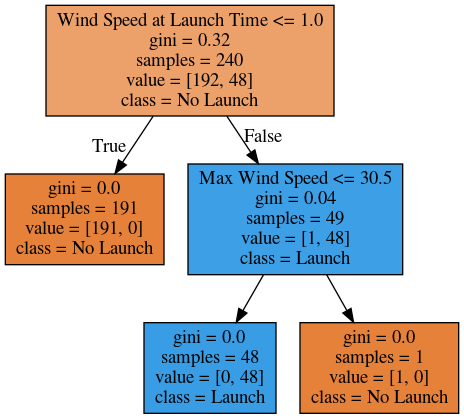

In [49]:
# This function takes a machine learning model and visualizes it.
tree_graph_to_png(tree=tree_model, feature_names=X.columns.values,class_names=['No Launch','Launch'], png_file_to_save='decision-tree.png')

Overall, when we look at the dataset, we have 240 samples:

- 192 are no launches
- 48 are launches

This result is because of our data cleaning strategy, where we assumed all non-labeled days are no-launch days.

Using the new labels, we can say "If the wind speed was less than 1.0, then 191 of the 240 samples guessed that no launch was possible on that day." This result might seem odd, but based on the data it's correct. Here's the evidence: We plotted the launch versus no-launch distribution for days that the Wind Speed at Launch Time <= 1 prior to dropping the column earlier in this notebook and it shows that for nearly all times we don’t launch:

# Understand the visualization

This simple tree shows you that the most important feature of the data was Wind Speed at Launch Time. If the wind speed was less than 1.0, then 191 of the 240 samples were correctly guessed to be no launch. We see that 191 of those samples only needed the Wind Speed at Launch Time value to be less than 1.0 to correctly guess the outcome, while above 1.0 required more information.

This insight isn't good. We previously set all values that were empty to 0. We also know that many of the values that were related to the time of launch were 0 because 60% of our data wasn't related to an actual launch or attempted launch.

As you continue to look at the tree, you can see that Max Wind Speed is the next most important feature of the data. Here, you can see that of the remaining 49 days when the max wind speed was less than 30.5, 48 of the days yielded a correct launch output and one of them yielded a no-launch output.

This data might be more interesting with some real-world context. There was only one day where a launch was planned and the Max Wind Speed value was greater than 30.5, which was May 27, 2020. The Space X Dragon launch was then postponed to May 30, 2020. Here's the evidence:

In [50]:
launch_data[(launch_data['Wind Speed at Launch Time'] > 1) & (launch_data['Max Wind Speed'] > 30.5)]

,Crewed or Uncrewed,High Temp,Low Temp,Ave Temp,Temp at Launch Time,Hist High Temp,Hist Low Temp,Hist Ave Temp,Percipitation at Launch Time,Hist Ave Percipitation,Wind Direction,Max Wind Speed,Visibility,Wind Speed at Launch Time,Condition
292,0,86.0,70.0,75.02,74.0,87.0,70.0,79.0,0.28,0.15,4,32.0,10.0,25.0,2
